In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import qiskit.quantum_info as qi

# Tomography Functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
import qiskit.ignis.mitigation.measurement as mc
from qiskit.providers.aer import noise



In [3]:
def error_correct(err):
    '''err = 'x' 
       err = 'y'
       err = 'z'
       err = 'i'
       These represent the different single qubit Pauli errors that can occur on the second qubit
       This function outputs a circuit which corrects a bell pair
    '''
    qreg_q = QuantumRegister(4, 'q')
#     creg_c = ClassicalRegister(4, 'c')
    circuit = QuantumCircuit(qreg_q)
    
    # Create the bell Pair
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[2])
    circuit.cx(qreg_q[0], qreg_q[1])
#     circuit.barrier(qreg_q[1])

    # Add the error
    if err == 'x':
        circuit.x(qreg_q[1])
    elif err == 'y':
        circuit.y(qreg_q[1])
    elif err == 'z':
        circuit.z(qreg_q[1])
    elif err == 'i':
        pass
#     circuit.barrier(qreg_q[1])
    
    # Measure the Sx stabilizer
    circuit.cx(qreg_q[2], qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[0])
#     circuit.barrier(qreg_q[1])
    circuit.h(qreg_q[2])
    
    # Measure the Sz stabilizer
    circuit.cx(qreg_q[0], qreg_q[3])
    circuit.cx(qreg_q[1], qreg_q[3])
#     circuit.barrier(qreg_q[2])

    # Apply corrections using deferred measurement
    circuit.cx(qreg_q[3], qreg_q[1])
    circuit.cz(qreg_q[2], qreg_q[1])

    return circuit,qreg_q

In [4]:
def error(err):
    '''err = 'x' 
       err = 'y'
       err = 'z'
       err = 'i'
       These represent the different single qubit Pauli errors that can occur on the second qubit
       This function outputs a circuit which gives a corrupted bell pair
    '''
    qreg_q = QuantumRegister(2, 'q')
#     creg_c = ClassicalRegister(4, 'c')
    circuit = QuantumCircuit(qreg_q)

    circuit.h(qreg_q[0])
    circuit.cx(qreg_q[0], qreg_q[1])
#     circuit.barrier(qreg_q[1])
    if err == 'x':
        circuit.x(qreg_q[1])
    elif err == 'y':
        circuit.y(qreg_q[1])
    elif err == 'z':
        circuit.z(qreg_q[1])
    elif err == 'i':
        pass

    return circuit,qreg_q

## Creating the Ideal State

In [5]:
# Create the expected statevector
q2 = QuantumRegister(2)
bell = QuantumCircuit(q2)
bell.h(q2[0])
bell.cx(q2[0], q2[1])
bell.draw('mpl')

target_state_bell = qi.Statevector.from_instruction(bell)
print(target_state_bell)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


## Creating Error Correction Circuits and Doing Tomography

### No Error

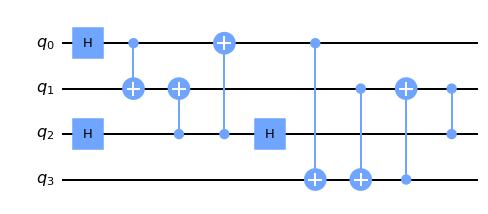

In [4]:
error_correct('i')[0].draw('mpl')

/opt/conda/lib/python3.8/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/opt/conda/lib/python3.8/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
/opt/conda/lib/python3.8/site-packages/qiskit/circui

State Fidelity: F = 0.99790


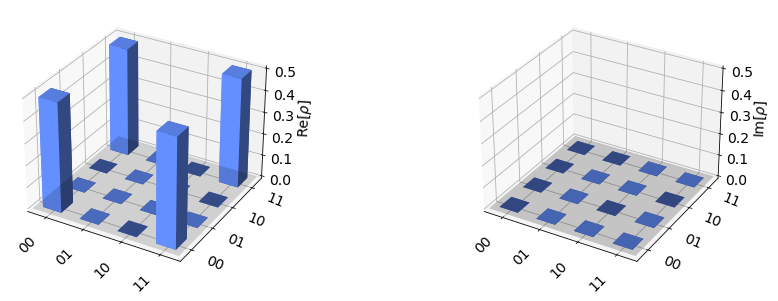

In [6]:
circuit,q = error('i')
qst_bell = state_tomography_circuits(circuit, [q[0], q[1]])

# Execute
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)

# Fit result
tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)

# Perform the tomography fit
# which outputs a density matrix
rho_fit_bell = tomo_fitter_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_bell, target_state_bell)
print('State Fidelity: F = {:.5f}'.format(F_bell))
plot_state_city(rho_fit_bell)

In [5]:
circuit,q = error_correct('i')
qst_bell = state_tomography_circuits(circuit, [q[0], q[1]])

# Execute
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)

# Fit result
tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)

# Perform the tomography fit
# which outputs a density matrix
rho_fit_bell = tomo_fitter_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_bell, target_state_bell)
print('State Fidelity: F = {:.5f}'.format(F_bell))


/opt/conda/lib/python3.8/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/opt/conda/lib/python3.8/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
/opt/conda/lib/python3.8/site-packages/qiskit/circui

State Fidelity: F = 0.99826


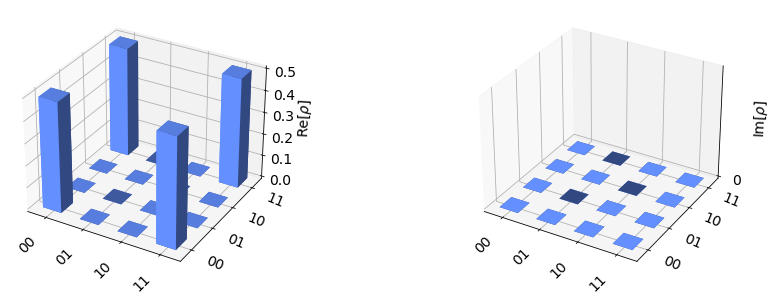

In [6]:
plot_state_city(target_state_bell)

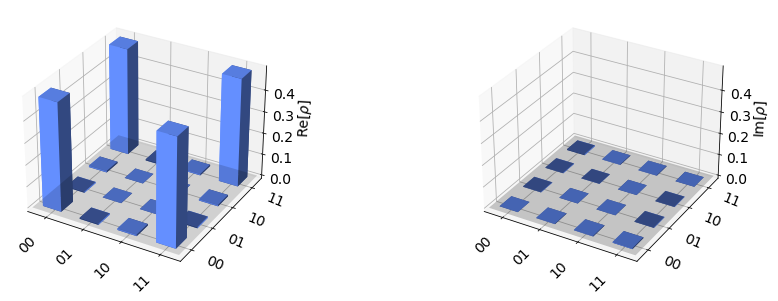

In [7]:
plot_state_city(rho_fit_bell)

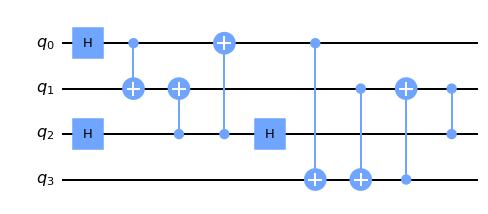

In [8]:
circuit.draw('mpl')

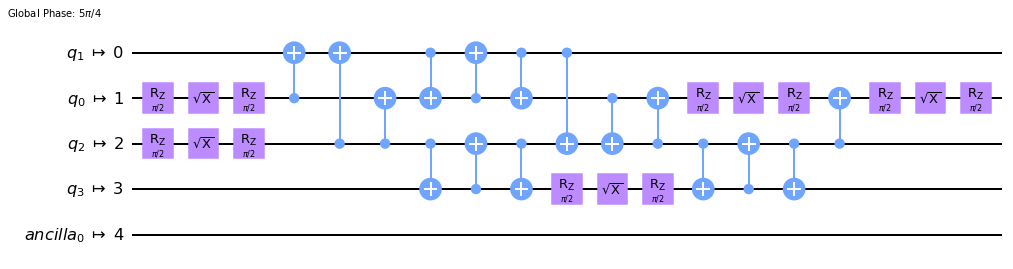

In [9]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(circuit, backend, optimization_level=3)
t_qc.draw('mpl')

In [10]:

#Add measurement noise
noise_model = noise.NoiseModel.from_backend(backend)

#generate the calibration circuits
meas_calibs, state_labels = mc.complete_meas_cal(qubit_list=[0,1])

# backend = Aer.get_backend('qasm_simulator')
job_cal = qiskit.execute(meas_calibs, backend=backend, shots=1024)
job_tomo = qiskit.execute(qst_bell, backend=backend, shots=1024)

meas_fitter = mc.CompleteMeasFitter(job_cal.result(),state_labels)

tomo_bell = StateTomographyFitter(job_tomo.result(), qst_bell)

#no correction
rho_bell = tomo_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_bell, target_state_bell)
print('State fidelity (no correction): F = {:.5f}'.format(F_bell))

#correct data
correct_tomo_results = meas_fitter.filter.apply(job_tomo.result(), method='least_squares')
tomo_bell_mit = StateTomographyFitter(correct_tomo_results, qst_bell)
rho_fit_bell_mit = tomo_bell_mit.fit(method='lstsq')
F_bell_mit = qi.state_fidelity(rho_fit_bell_mit, target_state_bell)
print('State fidelity (w/ correction): F = {:.5f}'.format(F_bell_mit))

State fidelity (no correction): F = 0.35540
State fidelity (w/ correction): F = 0.37754


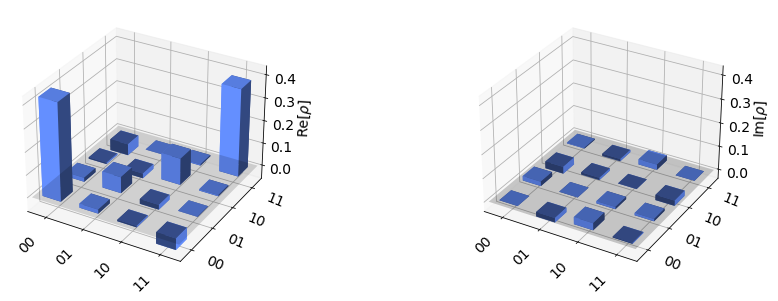

In [11]:
plot_state_city(rho_bell)

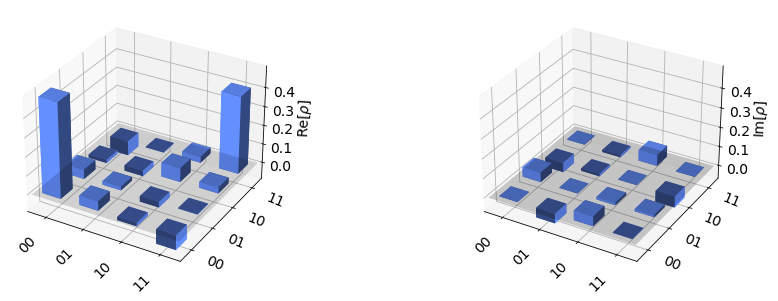

In [12]:
plot_state_city(rho_fit_bell_mit)

## X Error

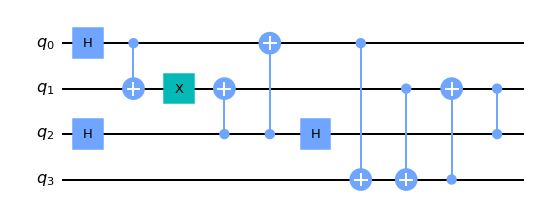

In [4]:
error_correct('x')[0].draw('mpl')

State Fidelity: F = 0.00208


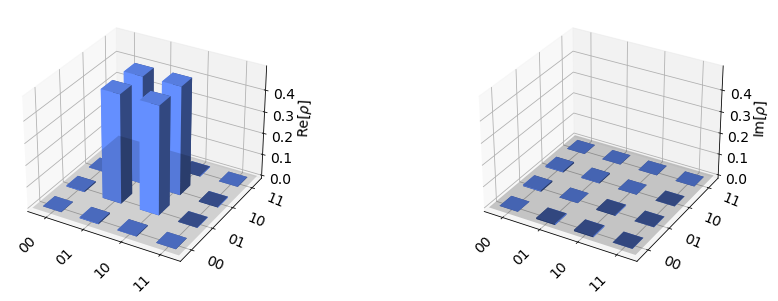

In [7]:
circuit,q = error('x')
qst_bell = state_tomography_circuits(circuit, [q[0], q[1]])

# Execute
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)

# Fit result
tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)

# Perform the tomography fit
# which outputs a density matrix
rho_fit_bell = tomo_fitter_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_bell, target_state_bell)
print('State Fidelity: F = {:.5f}'.format(F_bell))
plot_state_city(rho_fit_bell)

In [8]:
circuit,q = error_correct('x')
qst_bell = state_tomography_circuits(circuit, [q[0], q[1]])

# Execute
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)

# Fit result
tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)

# Perform the tomography fit
# which outputs a density matrix
rho_fit_bell = tomo_fitter_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_bell, target_state_bell)
print('State Fidelity: F = {:.5f}'.format(F_bell))

State Fidelity: F = 0.99760


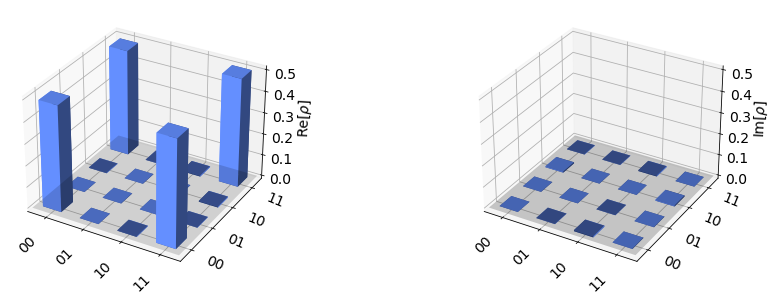

In [15]:
plot_state_city(rho_fit_bell)

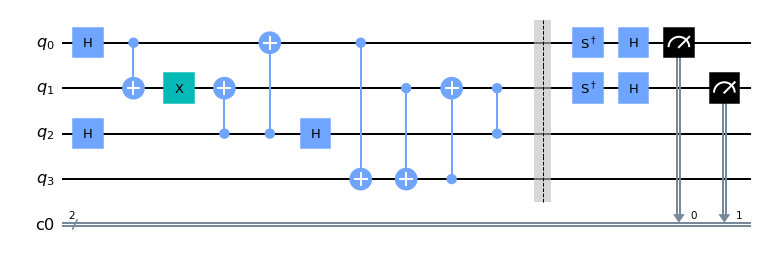

In [8]:
qst_bell[4].draw('mpl')

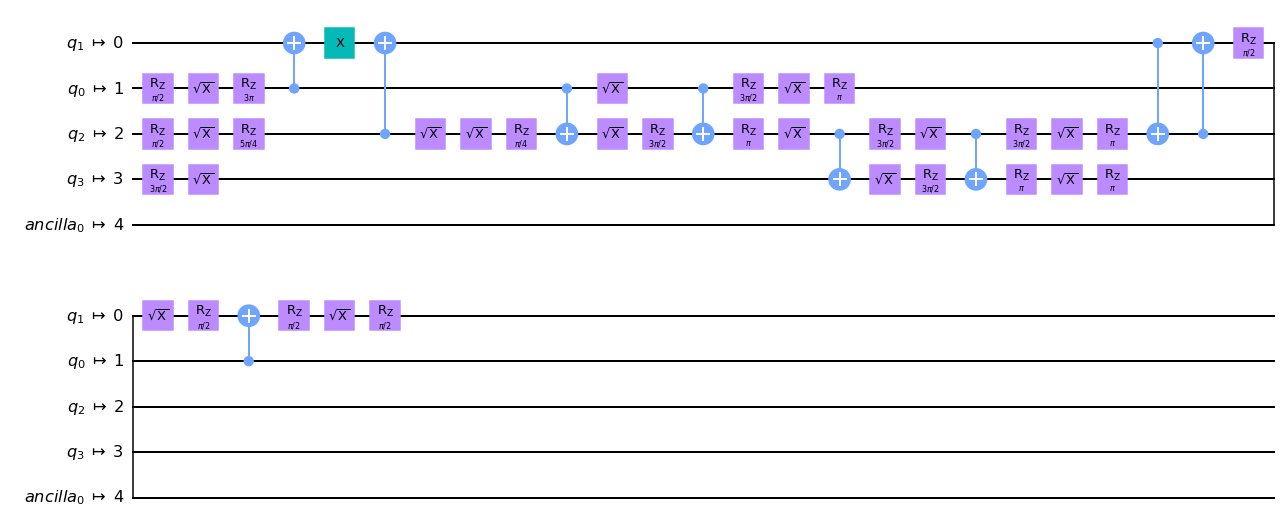

In [16]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(circuit, backend, optimization_level=3)
t_qc.draw('mpl')

In [17]:

#Add measurement noise
noise_model = noise.NoiseModel.from_backend(backend)

#generate the calibration circuits
meas_calibs, state_labels = mc.complete_meas_cal(qubit_list=[0,1])

# backend = Aer.get_backend('qasm_simulator')
job_cal = qiskit.execute(meas_calibs, backend=backend, shots=1024)
job_tomo = qiskit.execute(qst_bell, backend=backend, shots=1024)

meas_fitter = mc.CompleteMeasFitter(job_cal.result(),state_labels)

tomo_bell = StateTomographyFitter(job_tomo.result(), qst_bell)

#no correction
rho_bell = tomo_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_bell, target_state_bell)
print('State fidelity (no correction): F = {:.5f}'.format(F_bell))

#correct data
correct_tomo_results = meas_fitter.filter.apply(job_tomo.result(), method='least_squares')
tomo_bell_mit = StateTomographyFitter(correct_tomo_results, qst_bell)
rho_fit_bell_mit = tomo_bell_mit.fit(method='lstsq')
F_bell_mit = qi.state_fidelity(rho_fit_bell_mit, target_state_bell)
print('State fidelity (w/ correction): F = {:.5f}'.format(F_bell_mit))

State fidelity (no correction): F = 0.42366
State fidelity (w/ correction): F = 0.53705


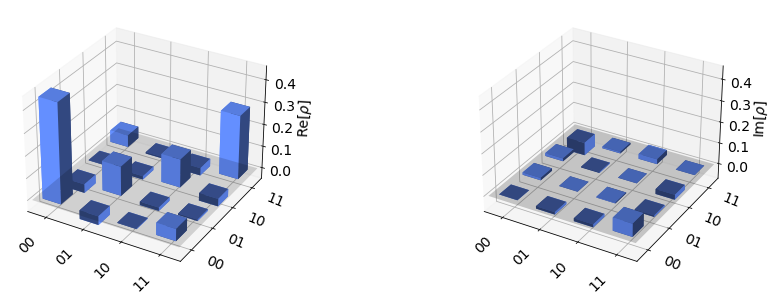

In [18]:
plot_state_city(rho_bell)

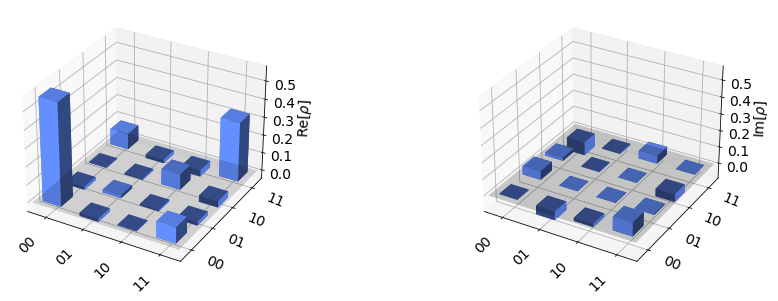

In [19]:
plot_state_city(rho_fit_bell_mit)

## Z Error

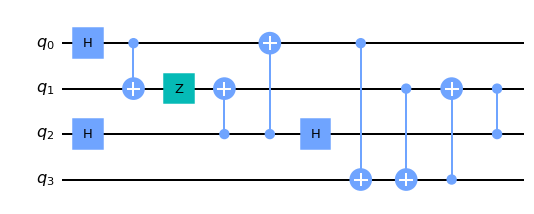

In [20]:
error_correct('z')[0].draw('mpl')

State Fidelity: F = 0.00119


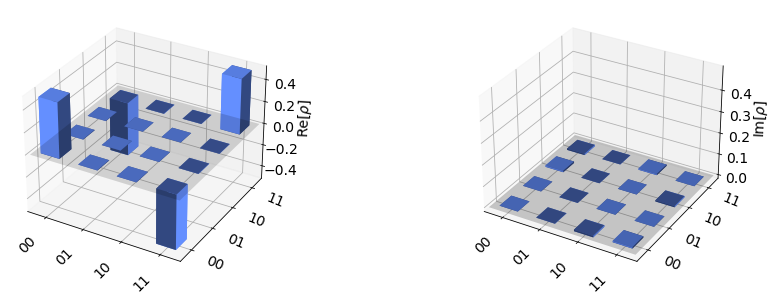

In [9]:
circuit,q = error('z')
qst_bell = state_tomography_circuits(circuit, [q[0], q[1]])

# Execute
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)

# Fit result
tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)

# Perform the tomography fit
# which outputs a density matrix
rho_fit_bell = tomo_fitter_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_bell, target_state_bell)
print('State Fidelity: F = {:.5f}'.format(F_bell))
plot_state_city(rho_fit_bell)

In [21]:
circuit,q = error_correct('z')
qst_bell = state_tomography_circuits(circuit, [q[0], q[1]])

# Execute
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)

# Fit result
tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)

# Perform the tomography fit
# which outputs a density matrix
rho_fit_bell = tomo_fitter_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_bell, target_state_bell)
print('State Fidelity: F = {:.5f}'.format(F_bell))

State Fidelity: F = 0.99488


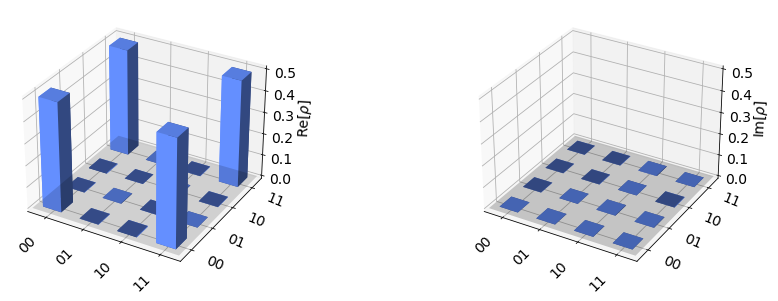

In [22]:
plot_state_city(rho_fit_bell)

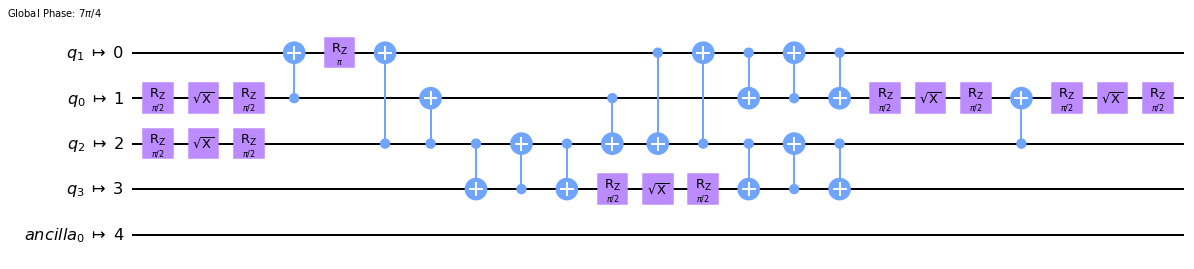

In [23]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(circuit, backend, optimization_level=3)
t_qc.draw('mpl')

In [24]:

#Add measurement noise
noise_model = noise.NoiseModel.from_backend(backend)

#generate the calibration circuits
meas_calibs, state_labels = mc.complete_meas_cal(qubit_list=[0,1])

# backend = Aer.get_backend('qasm_simulator')
job_cal = qiskit.execute(meas_calibs, backend=backend, shots=1024)
job_tomo = qiskit.execute(qst_bell, backend=backend, shots=1024)

meas_fitter = mc.CompleteMeasFitter(job_cal.result(),state_labels)

tomo_bell = StateTomographyFitter(job_tomo.result(), qst_bell)

#no correction
rho_bell = tomo_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_bell, target_state_bell)
print('State fidelity (no correction): F = {:.5f}'.format(F_bell))

#correct data
correct_tomo_results = meas_fitter.filter.apply(job_tomo.result(), method='least_squares')
tomo_bell_mit = StateTomographyFitter(correct_tomo_results, qst_bell)
rho_fit_bell_mit = tomo_bell_mit.fit(method='lstsq')
F_bell_mit = qi.state_fidelity(rho_fit_bell_mit, target_state_bell)
print('State fidelity (w/ correction): F = {:.5f}'.format(F_bell_mit))

State fidelity (no correction): F = 0.43906
State fidelity (w/ correction): F = 0.52743


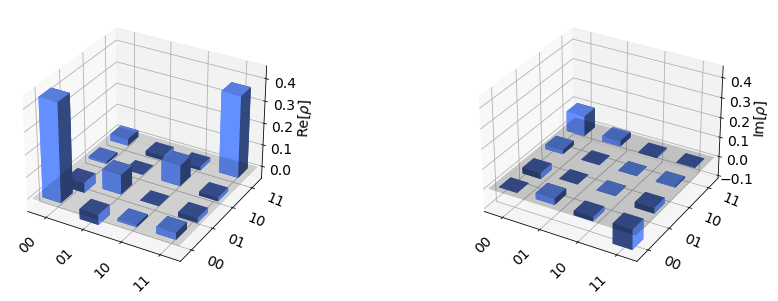

In [25]:
plot_state_city(rho_bell)

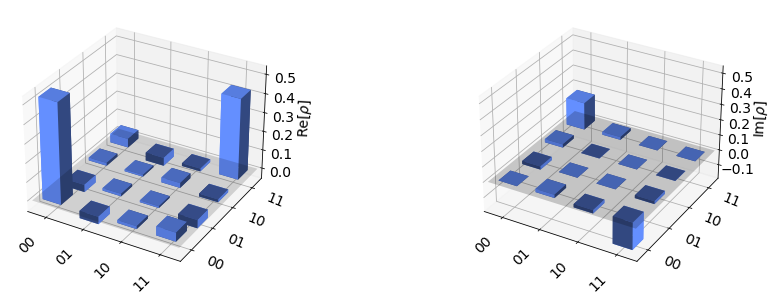

In [26]:
plot_state_city(rho_fit_bell_mit)

## Y Error

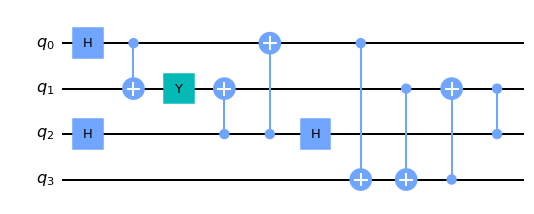

In [27]:
error_correct('y')[0].draw('mpl')

State Fidelity: F = 0.00004


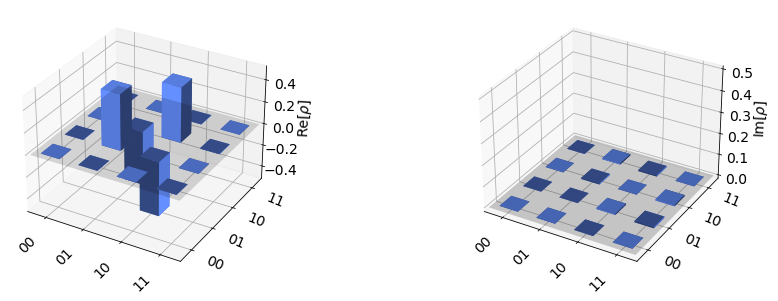

In [10]:
circuit,q = error('y')
qst_bell = state_tomography_circuits(circuit, [q[0], q[1]])

# Execute
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)

# Fit result
tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)

# Perform the tomography fit
# which outputs a density matrix
rho_fit_bell = tomo_fitter_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_bell, target_state_bell)
print('State Fidelity: F = {:.5f}'.format(F_bell))
plot_state_city(rho_fit_bell)

In [28]:
circuit,q = error_correct('y')
qst_bell = state_tomography_circuits(circuit, [q[0], q[1]])

# Execute
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)

# Fit result
tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)

# Perform the tomography fit
# which outputs a density matrix
rho_fit_bell = tomo_fitter_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_bell, target_state_bell)
print('State Fidelity: F = {:.5f}'.format(F_bell))

State Fidelity: F = 0.99721


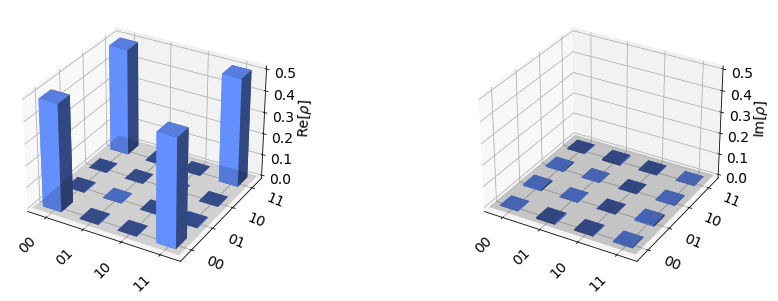

In [29]:
plot_state_city(rho_fit_bell)

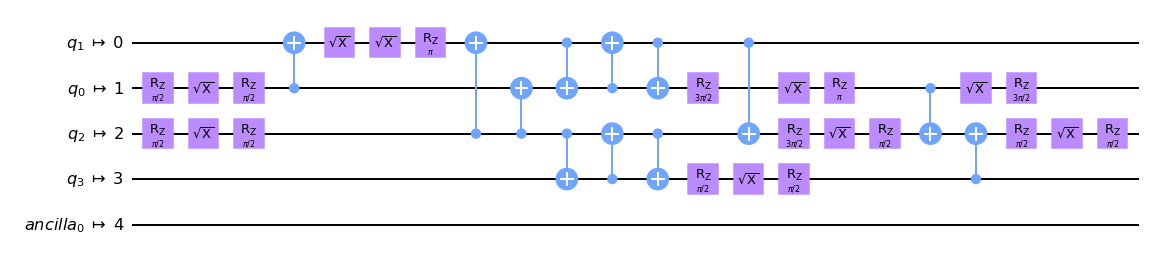

In [30]:
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(circuit, backend, optimization_level=3)
t_qc.draw('mpl')

In [31]:

#Add measurement noise
noise_model = noise.NoiseModel.from_backend(backend)

#generate the calibration circuits
meas_calibs, state_labels = mc.complete_meas_cal(qubit_list=[0,1])

# backend = Aer.get_backend('qasm_simulator')
job_cal = qiskit.execute(meas_calibs, backend=backend, shots=1024)
job_tomo = qiskit.execute(qst_bell, backend=backend, shots=1024)

meas_fitter = mc.CompleteMeasFitter(job_cal.result(),state_labels)

tomo_bell = StateTomographyFitter(job_tomo.result(), qst_bell)

#no correction
rho_bell = tomo_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_bell, target_state_bell)
print('State fidelity (no correction): F = {:.5f}'.format(F_bell))

#correct data
correct_tomo_results = meas_fitter.filter.apply(job_tomo.result(), method='least_squares')
tomo_bell_mit = StateTomographyFitter(correct_tomo_results, qst_bell)
rho_fit_bell_mit = tomo_bell_mit.fit(method='lstsq')
F_bell_mit = qi.state_fidelity(rho_fit_bell_mit, target_state_bell)
print('State fidelity (w/ correction): F = {:.5f}'.format(F_bell_mit))

State fidelity (no correction): F = 0.42415
State fidelity (w/ correction): F = 0.49513


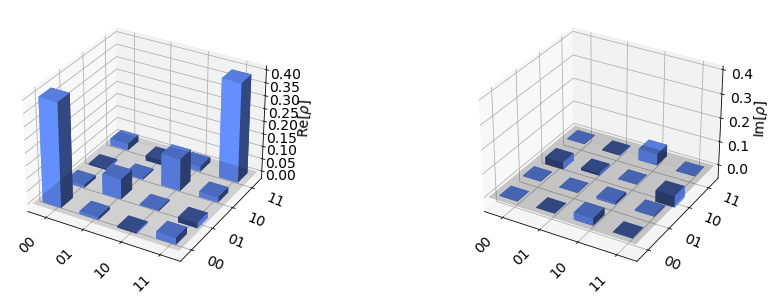

In [32]:
plot_state_city(rho_bell)

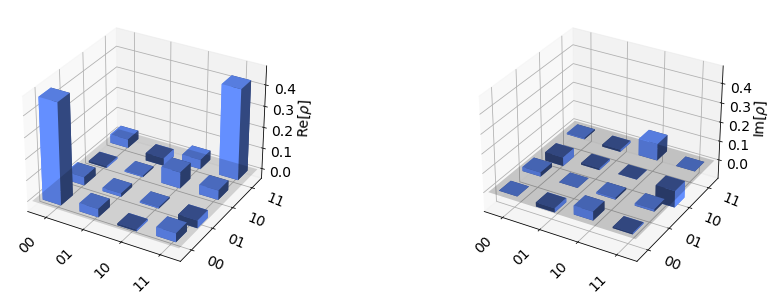

In [33]:
plot_state_city(rho_fit_bell_mit)